# Apply Machine Learning Algorithms over Sample Data 

### fei.zhang@ga.gov.au
### June 2016

In [2]:
import os, sys
import pickle
import numpy as np

from numpy import genfromtxt

import pandas as pd
#import pandas.io.data
from pandas_datareader import data, wb
from pandas import DataFrame



%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10 # increase plot size a bit...
rcParams['axes.formatter.useoffset'] = False  # disable scalar formatter / offset in axes labels

*  Tips:

      * To run a python script, use run path2/script.py
      * run ../python/apply_detree.py /g/data/u46/fxz547/wofs_training_sample_data/orig_copy/Test_Tile_samples_20140203.csv


In [3]:
# import your own modules by providing path
sys.path.append('../python')

import apply_detree

#import imp; imp.reload(apply_detree)  # force the interpreter to re-import if apply_detree.py changed

In [4]:
!ls -l /g/data/u46/fxz547/wofs_training_sample_data/
#my_file_csv='/g/data/u46/fxz547/wofs_training_sample_data/orig_copy/Test_Tile_samples_20140203.csv'


total 2191548
-rw-r--r--+ 1 fxz547 v10 2244135949 Jun 18 07:38 all_samples.csv
drwxr-xr-x+ 2 fxz547 v10       4096 Jun 18 07:39 orig_copy


In [5]:
my_file_csv='/g/data/u46/fxz547/wofs_training_sample_data/all_samples.csv'
pdf = apply_detree.get_pdf_from_csv(my_file_csv)
# todo: keep the old class_label. how to add a new_class column?

In [6]:
pdf.shape

(4937172, 17)

In [7]:
#  Assign W_* into Water; all other classes into NotWater. Binary classes

pdf['myclass'] = 0 # add a new column myclass
# change the column myclass to datatype uint8
pdf[['myclass']] =pdf[['myclass']].astype('uint8')

w_condition= pdf.Class_name.str.startswith('W') | pdf.Class_name.str.endswith('_Water')  #match('^W_*') and CloudShadow_Water

pdf.loc[w_condition, 'myclass'] = 128 #'Water'


In [8]:
# df[['id']] = df[['id']].astype(int)

pdf.dtypes

Bright        float64
Class_name     object
Mean_PQMas    float64
Mean_tm1c     float64
Mean_tm2c     float64
Mean_tm3c     float64
Mean_tm4c     float64
Mean_tm5c     float64
Mean_tm7c     float64
NDI_43        float64
NDI_52        float64
NDI_54        float64
NDI_72        float64
NDI_74        float64
Scene_Name     object
X_Min_Pxl     float64
Y_Min_Pxl     float64
myclass         uint8
dtype: object

In [9]:
pdf['myclass'].dtypes

dtype('uint8')

In [10]:
# Group by Pixel Class_name, then count the number of rows in each group
pdf.groupby('myclass').count()

,Bright,Class_name,Mean_PQMas,Mean_tm1c,Mean_tm2c,Mean_tm3c,Mean_tm4c,Mean_tm5c,Mean_tm7c,NDI_43,NDI_52,NDI_54,NDI_72,NDI_74,Scene_Name,X_Min_Pxl,Y_Min_Pxl
myclass,,,,,,,,,,,,,,,,,
0,3988944,3988944,3988944,3988944,3988944,3988944,3988944,3988944,3988944,3988944,3988944,3988944,3988944,3988944,3988944,3988944,3988944
128,948228,948228,948228,948228,948228,948228,948228,948228,948228,948228,948228,948228,948228,948228,948228,948228,948228


In [12]:
pdf.groupby('Mean_PQMas').count()  # perfect good pixels

,Bright,Class_name,Mean_tm1c,Mean_tm2c,Mean_tm3c,Mean_tm4c,Mean_tm5c,Mean_tm7c,NDI_43,NDI_52,NDI_54,NDI_72,NDI_74,Scene_Name,X_Min_Pxl,Y_Min_Pxl,myclass
Mean_PQMas,,,,,,,,,,,,,,,,,
16383.0,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172


In [13]:
pdf.groupby('Class_name').count()

,Bright,Mean_PQMas,Mean_tm1c,Mean_tm2c,Mean_tm3c,Mean_tm4c,Mean_tm5c,Mean_tm7c,NDI_43,NDI_52,NDI_54,NDI_72,NDI_74,Scene_Name,X_Min_Pxl,Y_Min_Pxl,myclass
Class_name,,,,,,,,,,,,,,,,,
Bare,823985,823985,823985,823985,823985,823985,823985,823985,823985,823985,823985,823985,823985,823985,823985,823985,823985
BldShadow,5348,5348,5348,5348,5348,5348,5348,5348,5348,5348,5348,5348,5348,5348,5348,5348,5348
CloudShadow_Bare,35265,35265,35265,35265,35265,35265,35265,35265,35265,35265,35265,35265,35265,35265,35265,35265,35265
CloudShadow_Veg,30765,30765,30765,30765,30765,30765,30765,30765,30765,30765,30765,30765,30765,30765,30765,30765,30765
CloudShadow_Water,651,651,651,651,651,651,651,651,651,651,651,651,651,651,651,651,651
Cropping_Bare,120054,120054,120054,120054,120054,120054,120054,120054,120054,120054,120054,120054,120054,120054,120054,120054,120054
Cropping_DenseVeg,67931,67931,67931,67931,67931,67931,67931,67931,67931,67931,67931,67931,67931,67931,67931,67931,67931
Dark_Soil,87163,87163,87163,87163,87163,87163,87163,87163,87163,87163,87163,87163,87163,87163,87163,87163,87163
Road,12707,12707,12707,12707,12707,12707,12707,12707,12707,12707,12707,12707,12707,12707,12707,12707,12707


In [14]:
#perfect pixel has a quality flag 13683 in the column Mean_PQMa
bin(16383)

'0b11111111111111'

In [11]:
df_wlargebody= pdf[pdf['Class_name'] =='W_LargeBody']
df_wlargebody.shape

(258073, 18)

# Separate the Water and NonWater data

In [12]:
dfwater=pdf[pdf['myclass'] ==128]
dfnowater= pdf[pdf['myclass'] == 0]

In [13]:
dfwater.shape

(948228, 18)

In [14]:
dfnowater.shape

(3988944, 18)

# Plotting the values

See http://pandas.pydata.org/pandas-docs/stable/visualization.html


# How to design best ML models accordingly?

In [19]:
# https://www.google.com.au/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=how+to+design+Machine+learning+models+according+feature+stats

## Prepare sample dataset for scikit analysis

In [16]:
clm_list = []
for column in pdf.columns: clm_list.append(column)
    
print clm_list

['Bright', 'Class_name', 'Mean_PQMas', 'Mean_tm1c', 'Mean_tm2c', 'Mean_tm3c', 'Mean_tm4c', 'Mean_tm5c', 'Mean_tm7c', 'NDI_43', 'NDI_52', 'NDI_54', 'NDI_72', 'NDI_74', 'Scene_Name', 'X_Min_Pxl', 'Y_Min_Pxl', 'myclass']


In [20]:
# select 3 most important feature attributes as predictive columns
# Note that the order of these variables does not matter. The same decision tree will be arrived
pred_cols= [ clm_list[10],clm_list[12], clm_list[6], clm_list[7]]
print(pred_cols)

['NDI_52', 'NDI_72', 'Mean_tm4c', 'Mean_tm5c']


In [21]:
#select the columns values into numpy array

X= pdf[pred_cols].values

Y = pdf['myclass'].values  # the new column myclass
       
print X.shape, type(X), X.dtype
print Y.shape, Y.dtype

(4937172, 4) <type 'numpy.ndarray'> float64
(4937172,) uint8


In [22]:
X[:2]

array([[  3.16631872e-01,   6.74264008e-02,   8.22000000e+02,
          9.46000000e+02],
       [  3.95655036e-01,   1.28205128e-01,   8.56000000e+02,
          1.06000000e+03]])

In [23]:
Xw = dfwater[pred_cols].values

In [24]:
Xw[:2]

array([[ -2.02857143e-01,  -5.53505535e-01,   1.19300000e+03,
          5.58000000e+02],
       [ -4.41544885e-01,  -6.37225845e-01,   2.23600000e+03,
          5.35000000e+02]])

## Scikit-learn

In [33]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=7)

# Traing the model with the sample data %time clf = clf.fit(X, Y)

clf = clf.fit(X, Y)

In [34]:
# verify the model using function predict
isample= 227014
# Or get a random sample to compare
#isample=np.random.random_integers(0,999)

print (isample, clf.predict(X[isample,:].reshape(1, -1) ), Y[isample], pdf.Class_name.iloc[isample])

(227014, array([0], dtype=uint8), 128, 'W_Dark')


In [35]:
#3) Apply / evaluate
clf.score(X,Y)

0.98116249545286249

In [36]:
# Advanced_sklearn/Chapter%201/Classification.ipynb
# more methods, split the samples , validation 
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [37]:
print X_test.shape
clf.score(X_test,y_test)


(1234293, 4)


0.98129374467812747

In [38]:
# Cross validation
from sklearn.cross_validation import cross_val_score

for classifier in [clf] :
    scores = cross_val_score(classifier, X, Y, cv=5)
    print(scores)
    print(np.mean(scores))

[ 0.95676981  0.92487202  0.98203932  0.97658274  0.98381156]
0.964815090453


In [39]:
# Let's Generate the Tree.

from IPython.display import Image 
from sklearn.externals.six import StringIO  
import pydot 
with open("de_tree.dot", 'w') as f: f = tree.export_graphviz(clf, out_file=f)

    
# dot -Tpdf iris.dot -o iris.pdf

!dot -Tpdf de_tree.dot -o de_tree4v7Dep.pdf

In [34]:
!ls -ltr

total 1168
-rwx------+ 1 fxz547 v10  17210 Jun 18 10:54 de_tree_3357perfectpixels_3features.pdf
-rwx------+ 1 fxz547 v10  36608 Jun 25 17:05 de_tree2.pdf
-rw-r--r--+ 1 fxz547 v10  28215 Jun 26 08:13 water_pixel_images_classif.ipynb
-rwx------+ 1 fxz547 v10  21812 Jun 26 13:58 de_tree_V2D5.pdf
-rw-r--r--+ 1 fxz547 v10   5608 Jun 26 14:05 detree_clfV2D5.pickle
-rw-r--r--+ 1 fxz547 v10   5608 Jun 26 15:45 detree_clfV3D5.pickle
-rwx------+ 1 fxz547 v10  89410 Jun 27 12:14 explore_csv_data.ipynb
-rw-r--r--+ 1 fxz547 v10     82 Jul  2 09:15 detreedep5.pkl_04.npy
-rw-r--r--+ 1 fxz547 v10   3768 Jul  2 09:15 detreedep5.pkl_03.npy
-rw-r--r--+ 1 fxz547 v10   1088 Jul  2 09:15 detreedep5.pkl_02.npy
-rw-r--r--+ 1 fxz547 v10     88 Jul  2 09:15 detreedep5.pkl_01.npy
-rw-r--r--+ 1 fxz547 v10    835 Jul  2 09:15 detreedep5.pkl
-rw-r--r--+ 1 fxz547 v10   5608 Jul  2 09:16 detree_clf.pickle
-rw-r--r--+ 1 fxz547 v10 472904 Jul  2 12:15 explore_water_datas.ipynb
-rwx------+ 1 fxz547 v10 221056 Jul  2 12:

In [36]:
# http://scikit-learn.org/stable/modules/model_persistence.html
import pickle
s = pickle.dumps(clf)

#print(s)
#to unpickle clf2 = pickle.loads(s)
#clf2.predict(X[0:1])
#array([0])


In [37]:
# unpickle
clf1 = pickle.loads(s)

In [38]:
from sklearn.externals import joblib
joblib.dump(clf, 'detreedep5.pkl') 

#Later you can load back the pickled model (possibly in another Python process) with:
#clf = joblib.load('detreedep5.pkl')

# Note joblib.dump returns a list of filenames. Each individual numpy array contained in the clf object is serialized as a separate file on the filesystem. All files are required in the same folder when reloading the model with joblib.load.

['detreedep5.pkl',
 'detreedep5.pkl_01.npy',
 'detreedep5.pkl_02.npy',
 'detreedep5.pkl_03.npy',
 'detreedep5.pkl_04.npy']

In [39]:
clf2 = joblib.load('detreedep5.pkl')

In [40]:
with open('detree_clf.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(clf, f, pickle.HIGHEST_PROTOCOL)

In [41]:

with open('detree_clf.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    clf3 = pickle.load(f)

In [42]:
print (clf,clf1,clf2,clf3)

(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_w

In [43]:
if clf2 ==clf1:  # This object comparison does not work correctly
    print ("unpickled OK")
else:
    print("This may not worked?")

This may not worked?


In [44]:
isample= 104971

print (isample, clf.predict(X[isample,:].reshape(1, -1) ), Y[isample], pdf.Class_name.iloc[isample])

print (isample, clf1.predict(X[isample,:].reshape(1, -1) ), Y[isample], pdf.Class_name.iloc[isample])
print (isample, clf2.predict(X[isample,:].reshape(1, -1) ), Y[isample], pdf.Class_name.iloc[isample])
print (isample, clf3.predict(X[isample,:].reshape(1, -1) ), Y[isample], pdf.Class_name.iloc[isample])

(104971, array([128], dtype=uint8), 128, 'W_SalineFlats')
(104971, array([128], dtype=uint8), 128, 'W_SalineFlats')
(104971, array([128], dtype=uint8), 128, 'W_SalineFlats')
(104971, array([128], dtype=uint8), 128, 'W_SalineFlats')


# Google search how to select important feature

** http://machinelearningmastery.com/an-introduction-to-feature-selection/

** http://scikit-learn.org/stable/modules/feature_selection.html
    

# you can pickle the clf tree for later use.

In [45]:
# http://scikit-learn.org/stable/modules/model_persistence.html

# http://stackoverflow.com/questions/15564410/scikit-learn-svm-how-to-save-load-support-vectors
# 
# show tree

clf.tree_.__getstate__()['nodes']

array([(1, 8, 0, 0.10469971597194672, 0.3101821505731033, 4937172, 4937172.0),
       (2, 5, 0, -0.037324436008930206, 0.17732165752527973, 952064, 952064.0),
       (3, 4, 2, -0.05954786390066147, 0.13244256093179585, 863955, 863955.0),
       (-1, -1, -2, -2.0, 0.010522770006009652, 376794, 376794.0),
       (-1, -1, -2, -2.0, 0.21478530105684257, 487161, 487161.0),
       (6, 7, 2, 0.11107654869556427, 0.46263242755345335, 88109, 88109.0),
       (-1, -1, -2, -2.0, 0.4931173406802858, 33863, 33863.0),
       (-1, -1, -2, -2.0, 0.3662142374209222, 54246, 54246.0),
       (9, 12, 0, 0.2561390995979309, 0.04373060095306269, 3985108, 3985108.0),
       (10, 11, 1, 0.005292419344186783, 0.4112926022454999, 155095, 155095.0),
       (-1, -1, -2, -2.0, 0.481985742189018, 94894, 94894.0),
       (-1, -1, -2, -2.0, 0.1911409847668053, 60201, 60201.0),
       (13, 14, 0, 0.3243926763534546, 0.022837454489595177, 3830013, 3830013.0),
       (-1, -1, -2, -2.0, 0.17899116886375943, 145074, 14507

# Let's Try some other methods

In [46]:
# from sklearn.svm import LinearSVC
# svm = LinearSVC(C=0.1)
# svm.fit(X_train, y_train)


# print(svm.predict(X_train))
# print(y_train)

# svm.score(X_train, y_train)

# svm.score(X_test, y_test)

# Random Forest

In [47]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators=50)
# rf.fit(X_train, y_train)
# from sklearn.svm import LinearSVC
# # svm = LinearSVC(C=0.1)
# # svm.fit(X_train, y_train)


# # print(svm.predict(X_train))
# # print(y_train)

# # svm.score(X_train, y_train)

# # svm.score(X_test, y_test)
# rf.predict(X_test)

# rf.score(X_test, y_test)

# Stop here. Do acuracy comparison:
    
# Random Forest 99.310%  Train slow
# LinearSVM 90.799%
# DecisionTree(depth=7) 96.756%  Train very fast. Complex tree

# Cross Validation
Advanced_sklearn/Chapter%201/Cross%20Validation.ipynb

In [48]:
# compute resource limit problem 
from sklearn.cross_validation import cross_val_score

#for classifier in [clf, svm, rf]:
for classifier in [clf] :
    scores = cross_val_score(classifier, X, Y, cv=5)
    print(scores)
    print(np.mean(scores))

# Results with my_file_csv='/g/data/u46/fxz547/wofs_training_sample_data/orig_copy/Test_Tile_samples_20140203.csv'
# random forest is no better than clf. svm is no good.
# [ 0.93761947  0.9168854   0.93080083  0.96054265  0.97094193]
# cls:  0.943358053934
# [ 0.84295027  0.93209894  0.90567316  0.90808262  0.90809689]
# svm:  0.899380377677
# [ 0.92633591  0.91465293  0.94864626  0.94893796  0.97848818]
# rf: 0.943412249083

[ 0.97041324  0.9352808   0.94940928  0.96666815  0.9782031 ]
0.959994914963


In [49]:
!ls -ltr

total 1024
-rwx------+ 1 fxz547 v10  17210 Jun 18 10:54 de_tree_3357perfectpixels_3features.pdf
-rwx------+ 1 fxz547 v10  36608 Jun 25 17:05 de_tree2.pdf
-rw-r--r--+ 1 fxz547 v10  28215 Jun 26 08:13 water_pixel_images_classif.ipynb
-rwx------+ 1 fxz547 v10  21812 Jun 26 13:58 de_tree_V2D5.pdf
-rw-r--r--+ 1 fxz547 v10   5608 Jun 26 14:05 detree_clfV2D5.pickle
-rw-r--r--+ 1 fxz547 v10   5608 Jun 26 15:45 detree_clfV3D5.pickle
-rwx------+ 1 fxz547 v10  89410 Jun 27 12:14 explore_csv_data.ipynb
-rw-r--r--+ 1 fxz547 v10 472904 Jul  2 12:15 explore_water_datas.ipynb
-rwx------+ 1 fxz547 v10 221056 Jul  2 12:59 analyse_water_yearlysummary_csv.ipynb
-rw-rw-r--+ 1 fxz547 u46  17195 Jul  2 13:08 de_tree.pdf
-rwx------+ 1 fxz547 v10   1455 Jul  2 13:08 de_tree.dot
-rw-r--r--+ 1 fxz547 v10    320 Jul  2 13:09 detreedep5.pkl_02.npy
-rw-r--r--+ 1 fxz547 v10     88 Jul  2 13:09 detreedep5.pkl_01.npy
-rw-r--r--+ 1 fxz547 v10     82 Jul  2 13:09 detreedep5.pkl_04.npy
-rw-r--r--+ 1 fxz547 v10   1080 Jul

In [50]:
print clf3

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


# PCA analysis

In [51]:
#sample function

def sample_PCA():
    """
    Code source: Gaël Varoquaux. License: BSD 3 clause
    """
    
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D


    from sklearn import decomposition
    from sklearn import datasets

    np.random.seed(5)

    centers = [[1, 1], [-1, -1], [1, -1]]
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target

    fig = plt.figure(1, figsize=(4, 3))
    plt.clf()  # Clear the current figure.
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    pca = decomposition.PCA(n_components=3)
    pca.fit(X)
    X = pca.transform(X)

    for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
        ax.text3D(X[y == label, 0].mean(),
                  X[y == label, 1].mean() + 1.5,
                  X[y == label, 2].mean(), name,
                  horizontalalignment='center',
                  bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    # Reorder the labels to have colors matching the cluster results
    y = np.choose(y, [1, 2, 0]).astype(np.float)
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral)

    x_surf = [X[:, 0].min(), X[:, 0].max(),
              X[:, 0].min(), X[:, 0].max()]
    y_surf = [X[:, 0].max(), X[:, 0].max(),
              X[:, 0].min(), X[:, 0].min()]
    x_surf = np.array(x_surf)
    y_surf = np.array(y_surf)
    v0 = pca.transform(pca.components_[[0]])
    v0 /= v0[-1]
    v1 = pca.transform(pca.components_[[1]])
    v1 /= v1[-1]

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

    plt.show()


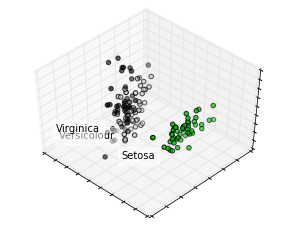

In [52]:
sample_PCA()

In [53]:
print (X.shape)

(4937172, 3)


In [54]:
Xw = dfwater[pred_cols].values
Xn = dfnowater[pred_cols].values


('Normalised Eigenvalues ', array([ 0.84454342,  0.11467395,  0.04078263]))
('Eigen Vectors ', array([[-0.72887117, -0.57416006, -0.37294376],
       [ 0.19496106,  0.34811131, -0.91695622],
       [-0.65630558,  0.74105246,  0.14178945]]))
Covariance Matrix
[[ 0.15558151  0.11286295  0.06786563]
 [ 0.11286295  0.10404391  0.04910277]
 [ 0.06786563  0.04910277  0.07098286]]
(array([-15.09376423,   0.54819801,  -0.65630558]), array([-11.8899429 ,   0.97883102,   0.74105246]), array([-7.72307301, -2.57832814,  0.14178945]))


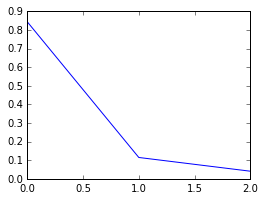

In [55]:
# See wofs/Zlocaltest/water_pixels_classification_1.ipynb

#http://stackoverflow.com/questions/27699545/scikit-learn-pca

from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

fig = plt.figure(1, figsize=(4, 3))
plt.clf()  # Clear the current figure.


pca = PCA(n_components=3)

# plugin the sample variables, X to see what are their characteristics
pca.fit(Xw)

pca_score = pca.explained_variance_ratio_   #Eigenvalues (normalized)
V = pca.components_   #Eigenvectors

print ('Normalised Eigenvalues ', pca_score)

print ('Eigen Vectors ', V)

print('Covariance Matrix')
print(pca.get_covariance()) #Covariance Matrix

x_pca_axis, y_pca_axis, z_pca_axis = V.T * pca_score / pca_score.min()

print (x_pca_axis, y_pca_axis, z_pca_axis )

# x_pca_axis, y_pca_axis, z_pca_axis = 3 * V.T
# x_pca_plane = np.r_[x_pca_axis[:2], - x_pca_axis[1::-1]]
# y_pca_plane = np.r_[y_pca_axis[:2], - y_pca_axis[1::-1]]
# z_pca_plane = np.r_[z_pca_axis[:2], - z_pca_axis[1::-1]]
# x_pca_plane.shape = (2, 2)
# y_pca_plane.shape = (2, 2)
# z_pca_plane.shape = (2, 2)
    
# ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])

plt.plot(pca_score, )

plt.show()


In [107]:
# Check normalisation:
-0.72887117*0.72887117  -0.57416006*0.57416006 -0.37294376*0.37294376

-1.00000000507931

In [56]:
#Transform the original attributes variables according to the PCA
Xwt1 = np.zeros(len(Xw),dtype='float32')
for i in xrange(0,len(Xw)):
    Xwt1[i]= -0.72887117*Xw[i,0] -0.57416006*Xw[i,1] -0.37294376*Xw[i,2]
   

In [57]:
Xwt1.size

947577

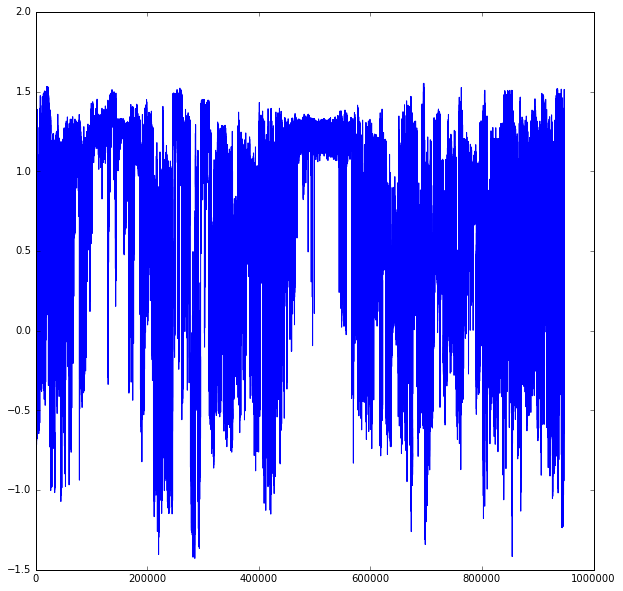

In [58]:
plt.plot(Xwt1)

(array([  6.00000000e+00,   1.00000000e+00,   6.00000000e+00,
          1.00000000e+00,   8.00000000e+00,   1.90000000e+01,
          1.30000000e+01,   1.70000000e+01,   3.10000000e+01,
          3.30000000e+01,   3.20000000e+01,   3.90000000e+01,
          5.40000000e+01,   6.10000000e+01,   1.04000000e+02,
          1.26000000e+02,   2.28000000e+02,   2.59000000e+02,
          4.44000000e+02,   6.33000000e+02,   7.82000000e+02,
          9.97000000e+02,   1.28300000e+03,   1.45100000e+03,
          1.68300000e+03,   2.01700000e+03,   2.10600000e+03,
          2.27700000e+03,   2.48600000e+03,   2.54200000e+03,
          2.85200000e+03,   3.03200000e+03,   3.12800000e+03,
          3.41600000e+03,   3.48600000e+03,   3.71500000e+03,
          4.19000000e+03,   4.51000000e+03,   5.14700000e+03,
          5.20200000e+03,   5.60300000e+03,   5.83100000e+03,
          6.49200000e+03,   6.49600000e+03,   6.77500000e+03,
          6.97300000e+03,   7.29900000e+03,   7.90200000e+03,
        

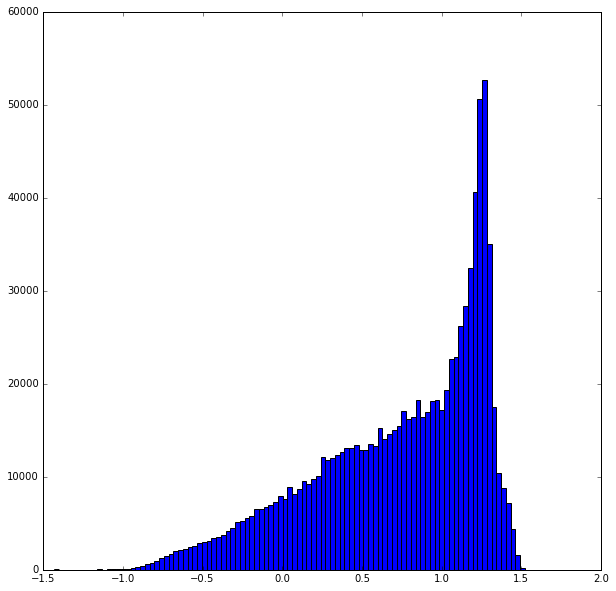

In [59]:
plt.hist(Xwt1,bins=100)

In [113]:
from math import sqrt
def proj2pe(Xn):
    
    nsize= len(Xn)

    Xp = np.zeros(nsize,dtype='float32')
    for i in xrange(0,nsize):
        vecsize= sqrt(Xn[i,0]*Xn[i,0] +Xn[i,1]*Xn[i,1] +Xn[i,2]*Xn[i,2])
        Xp[i]= (-0.72887117*Xn[i,0] -0.57416006*Xn[i,1] -0.37294376*Xn[i,2])/vecsize

    
    plt.subplot(2, 1, 1)
    plt.hist(Xp,bins=100)
    
    plt.subplot(2, 1, 2)
    plt.plot(Xp, '*')
    
    return Xp
   

In [110]:
Xw = dfwater[pred_cols].values
Xn = dfnowater[pred_cols].values


947577


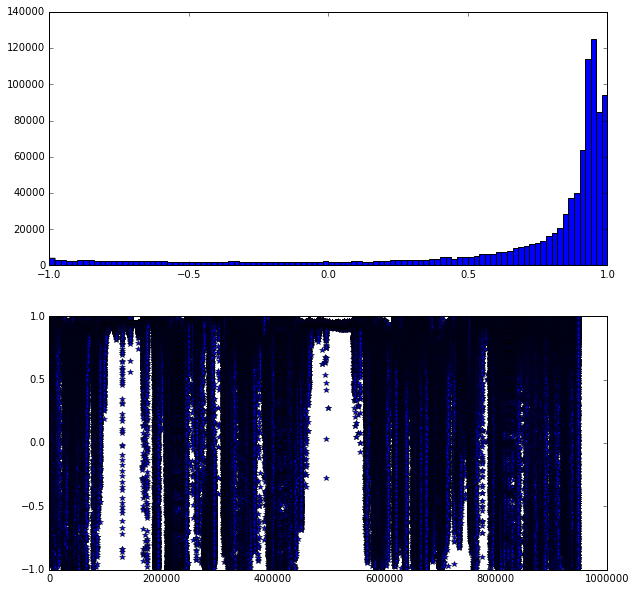

In [114]:
X_=Xw
print len(X_)
prod = proj2pe(X_)

3989595


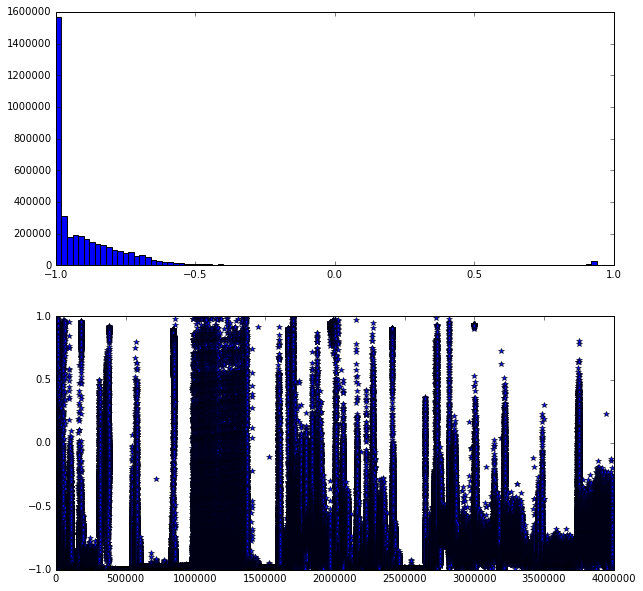

In [115]:
X_=Xn
print len(X_)
prod = proj2pe(X_)

In [72]:
CLNAME=pdf.Class_name.unique()
print CLNAME
ic=0

['CloudShadow_Bare' 'CloudShadow_Veg' 'W_LargeBody' 'W_Sea' 'W_Swamp'
 'BldShadow' 'W_Estuary' 'Dark_Soil' 'W_Salt_Lake' 'CloudShadow_Water'
 'TerrainShadow_Veg' 'W_River' 'W_SmallBody' 'W_SalineFlats' 'W_Turbid'
 'W_Dark' 'W_VegMix' 'Road' 'Snow' 'TerrainShadow_Snow' 'Bare'
 'Cropping_DenseVeg' 'V_Grassland' 'V_Riparian' 'V_Forest' 'Salt'
 'TerrainShadow_Bare' 'Cropping_Bare']


In [145]:
# loop over all classes to show
cname=CLNAME[ic]
print cname
dfs= pdf[pdf['Class_name'] == cname]
dfs.shape

X_ = dfs[pred_cols].values

print len(X_)
prod = proj2pe(X_)

ic=ic+1

IndexError: index 28 is out of bounds for axis 0 with size 28

In [64]:
TODO:
def classify_pixel(images, float64=False):
    """ 
    Implement the decision tree of Norman Mueller et al, to clssify a pixel with 6-bands input.
    Produce a water classification image from the supplied images (6 bands of an NBAR, multiband Landsat image)
    This method evaluates N.Mueller's 7-depth decision tree as follows:


                    -----------------------------N1---------------------------------
                    |                                                              |
                    |                                                              |
                 ---N2-----                                           -------------N21---------------------
                 |        |                                           |                                   |
                 |        |                                           |                                   |
       ----------N4----   N3                                    ------N22---                           ---N35-------
       |              |                                         |          |                           |           |
       |              |                                         |          |                           |           |
    ---N5---       ---N8--------------                       ---N24----    N23                      ---N37------   N36
    |      |       |                 |                       |        |                             |          |
    |      |       |                 |                       |        |                             |          |
    N6     N7   ---N12------------   N9             ---------N26---   N25                        ---N39-----   N38
                |                |                  |             |                              |         |
                |                |                  |             |                              |         |
             ---N16---        ---N13---             N27   --------N28---                   ------N41---    N40
             |       |        |       |                   |            |                   |          |
             |       |        |       |                   |            |                   |          |
             N17  ---N18---   N14     N15              ---N29---    ---N30---           ---N43---     N42
                  |       |                            |       |    |       |           |       |
                  |       |                            |       |    |       |           |       |
                  N19     N20                          N31     N32  N33     N34         N44     N45


:param images:
    A 3D numpy array ordered in (bands,rows,columns), containing the spectral data.
    It is assumed that the spectral bands follow Landsat 5 & 7, Band 1, Band 2, Band 3, Band 4, Band 5, Band 7.

:param float64:
    Boolean keyword. If set to True then the data will be converted to type float64 if not already float64.
    Default is False.

:return:
    A 2D numpy array of type UInt8.  Values will be 0 for No Water, 1 for Unclassified and 128 for water.

:notes:
    The input array will be converted to type float32 if not already float32.
    If images is of type float64, then images datatype will be left as is.

:transcription:
    Transcribed from a Tree diagram output by CART www.salford-systems.com
    Josh Sixsmith; joshua.sixsmith@ga.gov.au

    """

#     logger = logging.getLogger("WaterClasserfier")
#     logger.debug("Started")

    def band_ratio(a,b):
        """
        Calculates a normalised ratio index.
        """
        c = (a - b) / (a + b)
        return c

    dims = images.shape
    if len(dims) == 3:
        bands = dims[0]
        rows  = dims[1]
        cols  = dims[2]
    else:
        rows = dims[0]
        cols = dims[1]

    dtype = images.dtype

    # Check whether to enforce float64 calcs, unless the datatype is already float64
    # Otherwise force float32
    if float64:
        if (dtype != 'float64'):
            images = images.astype('float64')
    else:
        if (dtype == 'float64'):
            # Do nothing, leave as float64
            images = images
        elif (dtype != 'float32'):
            images = images.astype('float32')

    classified = numpy.ones((rows,cols), dtype='uint8')

    NDI_52 = band_ratio(images[4], images[1])
    NDI_43 = band_ratio(images[3], images[2])
    NDI_72 = band_ratio(images[5], images[1])

    b1 = images[0]
    b2 = images[1]
    b3 = images[2]
    b4 = images[3]
    b5 = images[4]
    b7 = images[5]

    # Lets start going down the trees left branch, finishing nodes as needed
    # Lots of result arrays eg r1, r2 etc of type bool are created
    # These could be recycled to save memory, but at the moment they serve to show the tree structure
    # Temporary arrays of type bool (_tmp, _tmp2) are used to combine the boolean decisions
    r1 = NDI_52 <= -0.01

    r2 = b1 <= 2083.5
    classified[r1 & ~r2] = 0 # Node 3

    r3 = b7 <= 323.5
    _tmp = r1 & r2
    _tmp2 = _tmp & r3
    _tmp &= ~r3

    r4 = NDI_43 <= 0.61
    classified[_tmp2 & r4]  = 128 # Node 6
    classified[_tmp2 & ~r4] = 0 # Node 7

    r5 = b1 <= 1400.5
    _tmp2 = _tmp & ~r5
    r6 = NDI_43 <= -0.01
    classified[_tmp2 & r6]  = 128 # Node 10
    classified[_tmp2 & ~r6] = 0 # Node 11

    _tmp &= r5

    r7 = NDI_72 <= -0.23
    _tmp2 = _tmp & ~r7
    r8 = b1 <= 379
    classified[_tmp2 & r8]  = 128 # Node 14
    classified[_tmp2 & ~r8] = 0 # Node 15

    _tmp &= r7

    r9 = NDI_43 <= 0.22
    classified[_tmp & r9] = 128 # Node 17

    _tmp &= ~r9

    r10 = b1 <= 473
    classified[_tmp & r10]  = 128 # Node 19
    classified[_tmp & ~r10] = 0 # Node 20

    # Left branch is completed; cleanup
    #logger.debug("B4 cleanup 1")
    del r2, r3, r4, r5, r6, r7, r8, r9, r10
    gc.collect()
    #logger.debug("cleanup 1 done")

    # Right branch of the tree
    r1 = ~r1

    r11 = NDI_52 <= 0.23
    _tmp = r1 & r11

    r12 = b1 <= 334.5
    _tmp2 = _tmp & ~r12
    classified[_tmp2] = 0 # Node 23

    _tmp &= r12

    r13 = NDI_43 <= 0.54
    _tmp2 = _tmp & ~r13
    classified[_tmp2] = 0 # Node 25

    _tmp &= r13

    r14 = NDI_52 <= 0.12
    _tmp2 = _tmp & r14
    classified[_tmp2] = 128 # Node 27

    _tmp &= ~r14

    r15 = b3 <= 364.5
    _tmp2 = _tmp & r15

    r16 = b1 <= 129.5
    classified[_tmp2 & r16]  = 128 # Node 31
    classified[_tmp2 & ~r16] = 0 # Node 32

    _tmp &= ~r15

    r17 = b1 <= 300.5
    _tmp2 = _tmp & ~r17
    _tmp &= r17
    classified[_tmp]  = 128 # Node 33
    classified[_tmp2] = 0 # Node 34

    _tmp = r1 & ~r11

    r18 = NDI_52 <= 0.34
    classified[_tmp & ~r18] = 0 # Node 36
    _tmp &= r18

    r19 = b1 <= 249.5
    classified[_tmp & ~r19] = 0 # Node 38
    _tmp &= r19

    r20 = NDI_43 <= 0.45
    classified[_tmp & ~r20] = 0 # Node 40
    _tmp &= r20

    r21 = b3 <= 364.5
    classified[_tmp & ~r21] = 0 # Node 42
    _tmp &= r21

    r22 = b1 <= 129.5
    classified[_tmp & r22]  = 128 # Node 44
    classified[_tmp & ~r22] = 0 # Node 45

    #logger.debug("completed")

    return classified


## Select Data to Analyse 